# LWCF Grant Funding in New England

The following analysis is based on grant information by state from 1965-2011 compiled by [Investigate West](http://www.invw.org/2012/06/11/lwcf-grants-database-1283/). There doesn't seem to be recent information. The Land and Water Conservation Fund (LWCF) [Project List by County and Summary Reports](https://waso-lwcf.ncrc.nps.gov/public/index.cfm) page is generally unresponsive and the latest Annual Report posted on nps.gov is from 2012.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Import data sets and concatenate into one DataFrame
states = ['CT', 'MA', 'ME', 'NH', 'RI', 'VT']
base_path = './Data/StateGrantData/CT_LWCFGrants1965-2011.xlsx'
temp_dfs = []

for state in states:
    temp_df = pd.read_excel('./Data/StateGrantData/{}_LWCFGrants1965-2011.xlsx'.format(state))
    temp_dfs.append(temp_df)

new_england = pd.concat(temp_dfs, ignore_index=True)

In [3]:
new_england.head()

,Grant ID & Element,Grant Name,Sponsor,County,State,Grant Amount,Year Approved,Year Completed,Type
0,1 - XXX,SULLIVAN PROPERTY,DEPT. OF AGRICULTURE & NATURAL RESOU,HARTFORD,CT,5000.0,1965,1967,Acquisition
1,3 - XXX,ADELMAN FIELD,TOWN OF BOZRAH,MIDDLESEX,CT,3000.0,1965,1966,Acquisition
2,4 - XXX,STATE OUTDOOR RECREATION PLAN,DEPT. OF AGRICULTURE & NATURAL RESOU,PLANNING,CT,22500.0,1965,1966,Planning
3,5 - XXX,COUTU PROPERTY,TOWN OF MANSFIELD,TOLLAND,CT,300.0,1965,1967,Acquisition
4,2 - XXX,GOODWIN STATE FOREST,DEPT. OF AGRICULTURE & NATURAL RESOU,WINDHAM,CT,6000.0,1965,1967,Acquisition


In [4]:
new_england.tail()

,Grant ID & Element,Grant Name,Sponsor,County,State,Grant Amount,Year Approved,Year Completed,Type
3255,626 - XXX,Grand Isle School Community Playground,Town of Grand Isle,GRAND ISLE,VT,34962.0,2011,2011,Development
3256,629 - XXX,Cabin Construction - Three State Parks,"State of Vermont, Dept.of Forests and Parks",MULTI-COUNTY,VT,153638.0,2011,2011,Development
3257,624 - XXX,Tunbridge Recreation Area Acquisition,Town of Tunbridge,ORANGE,VT,11035.0,2011,2011,Acquisition
3258,625 - XXX,Fair Haven Recreation Area and Playground,Town of Fair Haven,RUTLAND,VT,13000.0,2011,2011,Development
3259,627 - XXX,Chester Recreation - Community Pavilion Project,Town of Chester,WINDSOR,VT,17000.0,2011,2011,Development


In [5]:
new_england.shape

(3260, 9)

In [6]:
new_england.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 9 columns):
Grant ID & Element    3260 non-null object
Grant Name            3260 non-null object
Sponsor               3260 non-null object
County                3260 non-null object
State                 3260 non-null object
Grant Amount          3260 non-null float64
Year Approved         3260 non-null int64
Year Completed        3260 non-null int64
Type                  3260 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 229.3+ KB


In [7]:
# Grant Amount summary statistics
(new_england[['Grant Amount']]).describe()

,Grant Amount
count,3.260000e+03
mean,9.548901e+04
std,1.972163e+05
min,1.200000e-01
25%,1.507696e+04
50%,3.449163e+04
75%,9.000000e+04
max,2.596327e+06


## Distribution of Total Grant Amounts

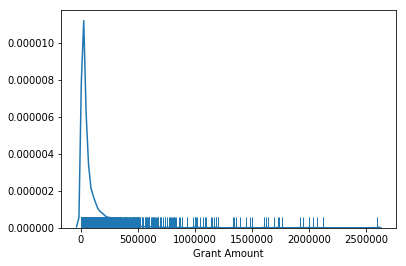

In [8]:
# Kernel density and rug plot of grant amounts
ne_grants = new_england['Grant Amount']  # save Grant Amount column as series
sns.distplot(ne_grants, hist=False, rug=True);

The kernel density plot for grant amounts shows a strongly right-skewed distribution, as also shown by the almost 3x difference between the mean (95,489) and median (34,491) values. Three-quarters of all grants are valued at 90,000 or less, but the presence of multi-million grants pulls the mean value higher than the third quartile.

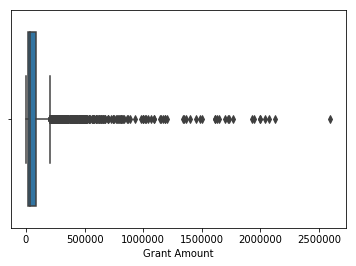

In [9]:
# Box plot of grant amounts to show outliers
sns.boxplot(ne_grants)

In [10]:
first_q = ne_grants.describe()['25%']
median = ne_grants.describe()['50%']
third_q = ne_grants.describe()['75%']
iqr = third_q - first_q
print('IQR: {0:,.0f}'.format(iqr))
outlier_low = first_q - 1.5 * iqr
outlier_high = 1.5 * iqr + third_q
print('The threshold for a high grant amount outlier: ${0:,.0f}'.format(outlier_high))
num_outliers = ne_grants[ne_grants > outlier_high].count()
print('Number of high grant amount outliers: {0:,.0f}'.format(num_outliers))

IQR: 74,923
The threshold for a high grant amount outlier: $202,385
Number of high grant amount outliers: 366


There are no low-end outliers (the first quartile less 1.5 times IQR is a negative number), but 366 high-end outliers. These are grant values above \$202,385, which is 1.5 times the interquartile range plus the third quartile amount. Out of the total data set of 3,260 observations, this is approximately 11% of the data set.

## Total Grant Amounts by State

In [36]:
# State Grant Totals by count
num_grants = new_england.groupby('State').count()['Grant Amount']
num_grants

State
CT    374
MA    450
ME    831
NH    640
RI    336
VT    629
Name: Grant Amount, dtype: int64

In [11]:
# State Grant Totals in millions
total_grants = new_england.groupby('State').sum()['Grant Amount'] / 1000000
total_grants

State
CT    63.195093
MA    97.591917
ME    40.857039
NH    36.508412
RI    39.826280
VT    33.315420
Name: Grant Amount, dtype: float64

In [32]:
# Total grant amounts (in millions) for New England
sum(total_grants)

311.29416275999995

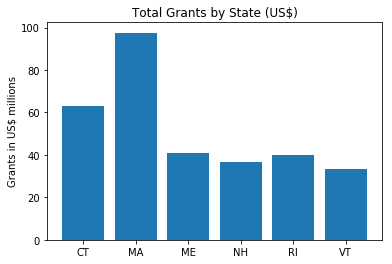

In [12]:
# Plot total grant amounts by state
y_pos = np.arange(len(states))

plt.figure()
plt.bar(y_pos, total_grants, align='center');
plt.xticks(y_pos, states);
plt.title('Total Grants by State (US$)');
plt.ylabel('Grants in US$ millions');
plt.show()

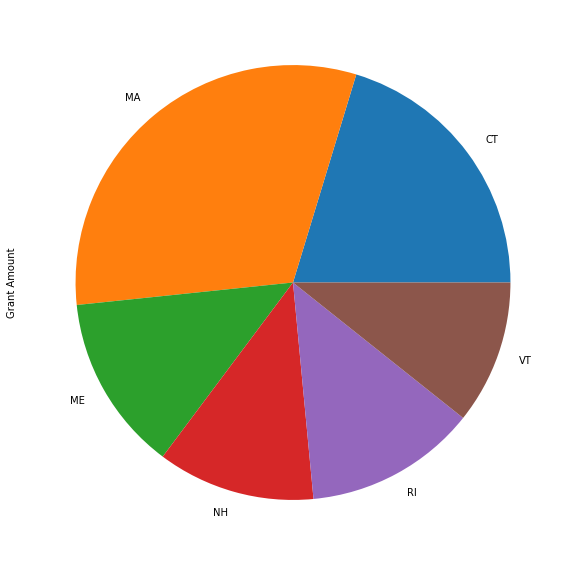

In [13]:
total_grants.plot(kind='pie', figsize=(10, 10));

<Figure size 432x288 with 0 Axes>

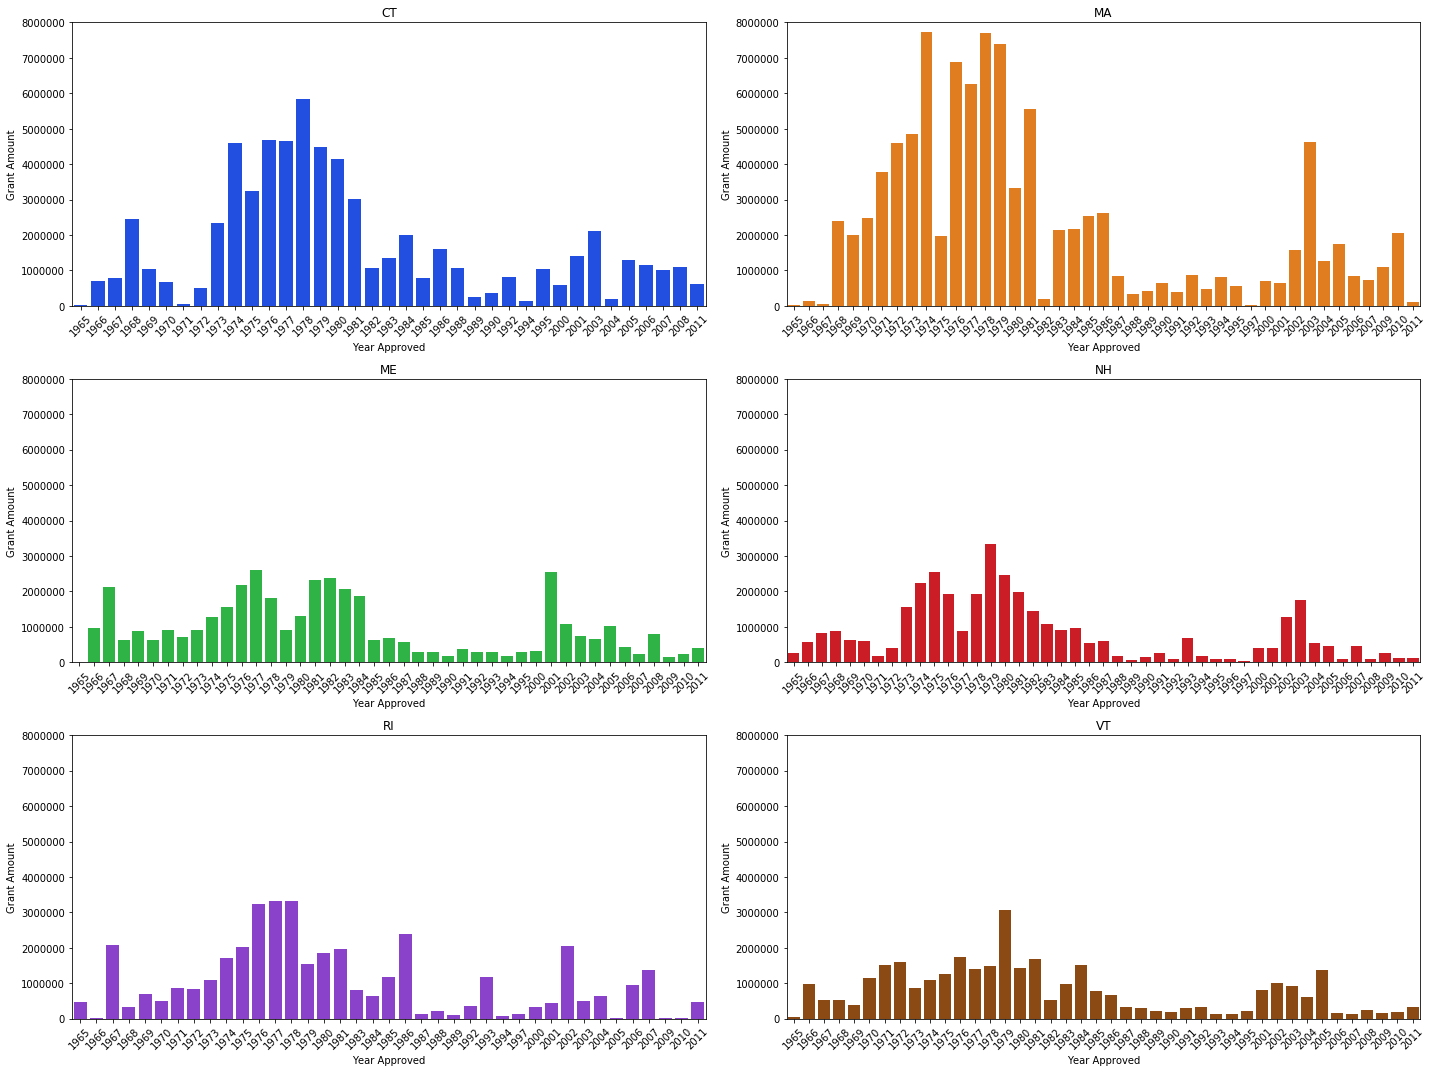

In [14]:
# Plot Grant Amount by Year for each state
plt.figure();
plt.subplots(3, 2, figsize=(20, 15));
colors = sns.color_palette('bright', 6)

for i, state in enumerate(states, start=1):
    plt.subplot(3, 2, i, title=state)
    sns.barplot(x='Year Approved',
                y='Grant Amount',
                data=new_england[new_england['State'] == state],
                estimator=np.sum,
                ci=0,
                color=colors[i-1]);
    plt.ylim([0, 8000000])
    plt.xticks(rotation=45);
    plt.tight_layout();

plt.show()

In [15]:
# # Plot grant amount by year for each state
# # Amounts determined by 'Year Approved' column
# grants_by_year = []
# for state in states:
#     tmp = new_england[new_england['State'] == state].groupby('Year Approved').sum()['Grant Amount']
#     grants_by_year.append(tmp)

# df_grants_by_year = pd.concat(grants_by_year, axis=1)
# df_grants_by_year.columns = states
# df_grants_by_year.fillna(value=0, inplace=True)

# # df_grants_by_year
# df_grants_by_year.plot(kind='bar', subplots=True, layout=(3, 2), title=states, sharey=True, figsize=(20, 15));

In general, it appears that Massachusetts and Connecticut are the biggest beneficiares by dollar-amount of LWCF grants (they have larger populations than the other New England states - see the table below, data from Wikipedia). Also, based on the annual grant amounts by year, the 1970's seem to be the golden years of investing in conservation projects. Investments tapered off through the 1990's, but there was renewed interest in the 2000's.

| State | Population |
| --- | --- |
| MA | 6,859,819 |
| CT | 3,576,452 |
| NH | 1,342,795 |
| ME | 1,331,479 |
| RI | 1,056,426 |
| VT |   624,594 |


## Number and Value of LWCF Grants by Type

In [16]:
# Breakdown of the number of each grant by type (for each state)
gt_num = new_england.groupby(['State', 'Type'])['Type'].count().unstack('Type').fillna(0)
gt_num

Type,Acquisition,Combination,Development,Planning,Redevelopment
State,,,,,
CT,199,9,114,9,43
MA,126,31,191,9,93
ME,152,77,476,29,97
NH,189,43,347,16,45
RI,77,14,204,15,26
VT,135,31,342,21,100


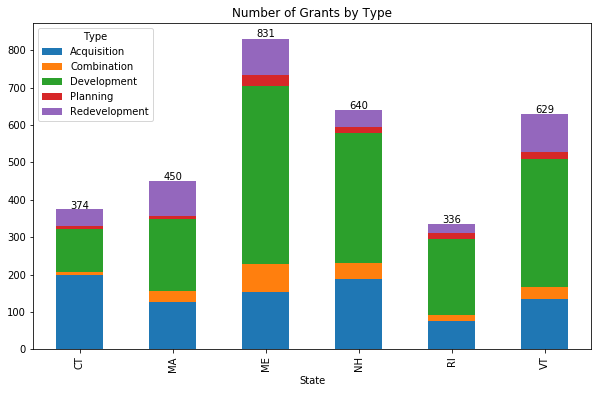

In [54]:
# Plot the number of grants by type
ax = gt_num.plot(kind='bar', figsize=(10,6), title='Number of Grants by Type', stacked=True)

# print(len(ax.patches))  # 30
x_vals = [p.get_x() for p in ax.patches][:6]

for i, bar_x in enumerate(x_vals):
    ax.annotate(str(num_grants[i]), (bar_x + 0.15, num_grants[i] * 1.005))

In [18]:
# Breakdown of the amount of each grant by type (for each state)
gt_amt = new_england.groupby(['State', 'Type'])['Grant Amount'].sum().unstack('Type') / 1000000
gt_amt

Type,Acquisition,Combination,Development,Planning,Redevelopment
State,,,,,
CT,32.279388,2.469008,21.795373,0.911663,5.739660
MA,29.470401,12.409701,36.422255,1.293133,17.996427
ME,10.707452,6.614504,18.218328,0.870131,4.446624
NH,10.118614,5.623054,17.101768,1.132974,2.532003
RI,6.549517,2.009323,24.080018,0.957441,6.229981
VT,9.617666,2.308353,16.240549,0.805994,4.342858


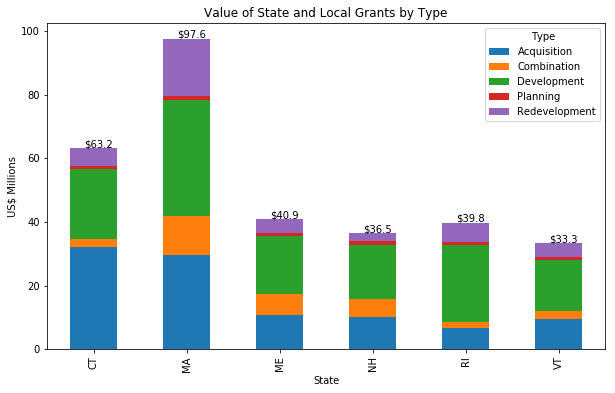

In [67]:
# Plot the dollar amount of grants by type
ax_amt = gt_amt.plot(kind='bar', figsize=(10,6), title='Value of State and Local Grants by Type', stacked=True);
plt.ylabel('US$ Millions');

x_vals_amt = [p.get_x() for p in ax_amt.patches][:6]

for i, bar_x in enumerate(x_vals_amt):
    ann = round(total_grants[i], 1)
    ax_amt.annotate('${}'.format(ann), (bar_x + 0.15, ann + 0.3))

plt.savefig('./GrantMap/GrantValByType.jpg')

The two charts above show the breakdown by number then by dollar for the different types of grants. The states appear to use grants mainly for Development and Acquisitions.

## Number and Value of Grants by County

In [20]:
county = new_england.groupby(['State', 'County'])['Grant Amount'].agg(['count', 'sum'])

# Reset multi-index to flatten columns
county = county.reset_index()
county.head()

,State,County,count,sum
0,CT,FAIRFIELD,65,7745008.26
1,CT,HARTFORD,69,11234580.53
2,CT,LITCHFIELD,23,2082009.35
3,CT,MIDDLESEX,37,4815886.84
4,CT,MULTI-COUNTY,10,5962815.13


In [21]:
np.min(county['sum'])

262500.0

<Figure size 432x288 with 0 Axes>

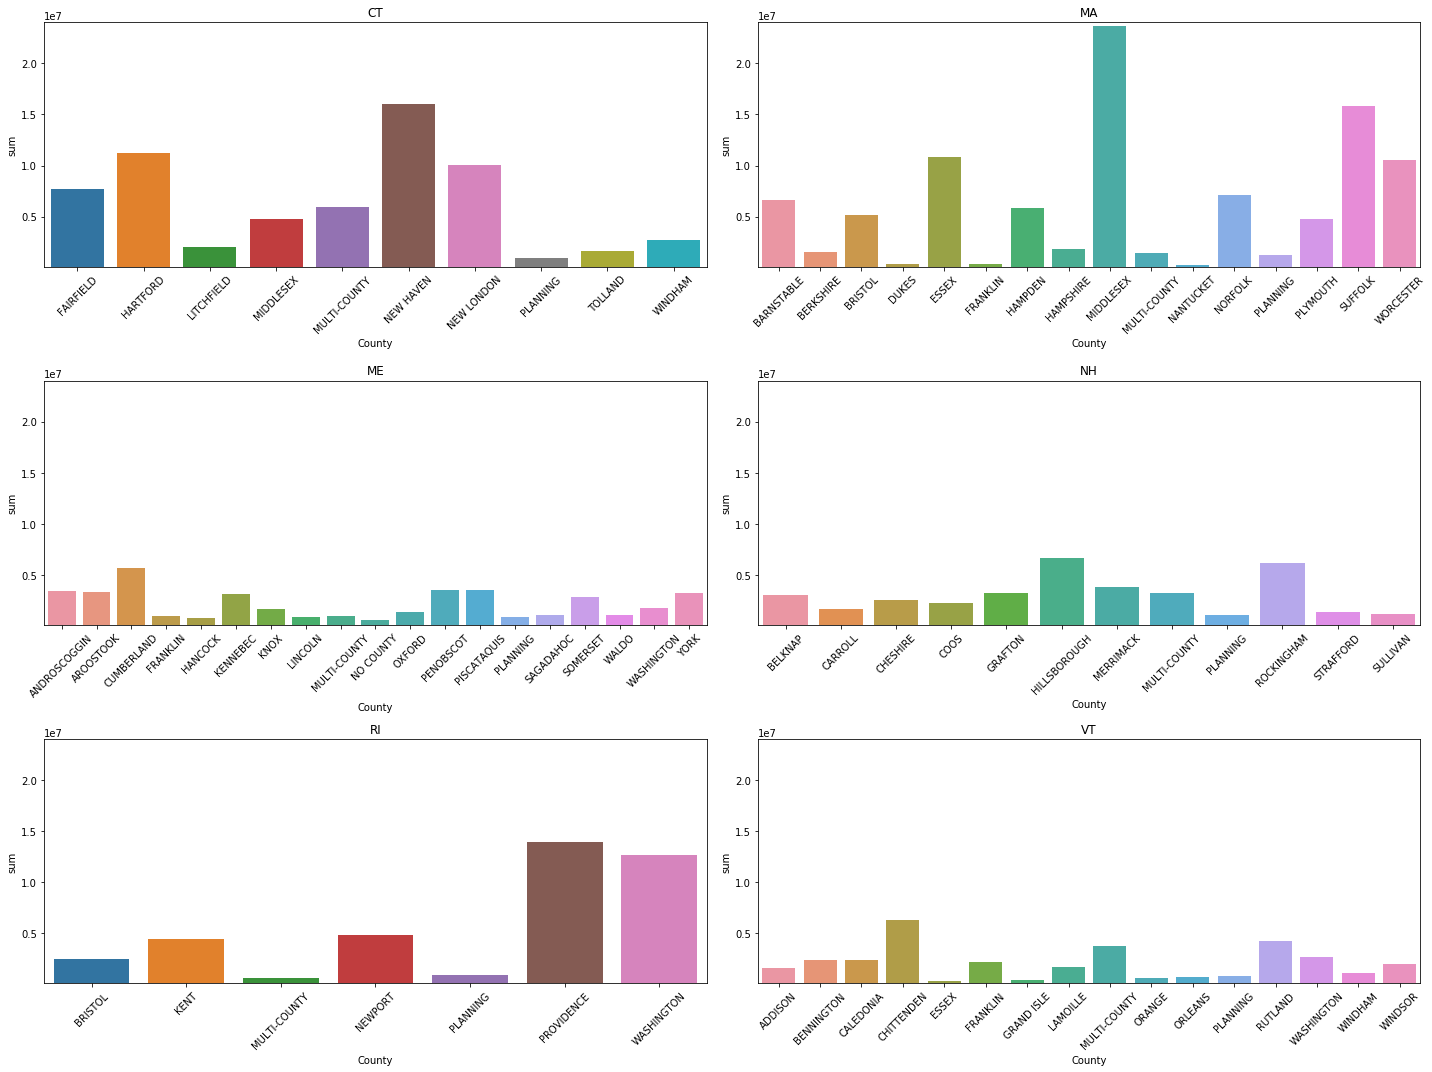

In [22]:
# Plot Grant totals by County for each state
plt.figure();
plt.subplots(3, 2, figsize=(20, 15));

for i, state in enumerate(states, start=1):
    plt.subplot(3, 2, i, title=state)
    sns.barplot(x='County',
                y='sum',
                data=county[county['State'] == state],
                ci=0);
    plt.ylim([100000, 24000000])
    plt.xticks(rotation=45);
    plt.tight_layout();

plt.show();

In [23]:
# Update county column to match formatting in names file
county['county_upd'] = county['County'].map(lambda s: s.title() + ' County')

# Drop multi-county, planning, and no county (Maine-only file) rows
county = county[~county['County'].isin(['MULTI-COUNTY', 'PLANNING', 'NO COUNTY'])]

# Create a unique key column for the join
county['key'] = county['county_upd'] + ' ' + county['State']

county.head(10)

,State,County,count,sum,county_upd,key
0,CT,FAIRFIELD,65,7745008.26,Fairfield County,Fairfield County CT
1,CT,HARTFORD,69,11234580.53,Hartford County,Hartford County CT
2,CT,LITCHFIELD,23,2082009.35,Litchfield County,Litchfield County CT
3,CT,MIDDLESEX,37,4815886.84,Middlesex County,Middlesex County CT
5,CT,NEW HAVEN,58,16042978.55,New Haven County,New Haven County CT
6,CT,NEW LONDON,53,10009612.67,New London County,New London County CT
8,CT,TOLLAND,27,1640086.59,Tolland County,Tolland County CT
9,CT,WINDHAM,23,2750451.98,Windham County,Windham County CT
10,MA,BARNSTABLE,19,6626674.09,Barnstable County,Barnstable County MA
11,MA,BERKSHIRE,17,1578548.66,Berkshire County,Berkshire County MA


In [24]:
# Import county id data
county_ids = pd.read_csv('./Data/county_names.csv', sep=',', dtype=str)
county_ids[county_ids['state'] == 'Connecticut']

,id,state,county
308,09001,Connecticut,Fairfield County
309,09003,Connecticut,Hartford County
310,09005,Connecticut,Litchfield County
311,09007,Connecticut,Middlesex County
312,09009,Connecticut,New Haven County
313,09011,Connecticut,New London County
314,09013,Connecticut,Tolland County
315,09015,Connecticut,Windham County


In [25]:
# Create state name and abbrev dictionary
st_name = county_ids['state'].unique()
st_abbrev = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
             'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
             'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
             'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
             'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR']

state_dict = dict(zip(st_name, st_abbrev))

In [26]:
# Create key column in county id DataFrame
county_ids['state_abbv'] = county_ids['state'].map(lambda s: state_dict[s])

county_ids['keyID'] = county_ids['county'] + ' ' + county_ids['state_abbv']

county_ids[county_ids['state_abbv'] == 'CT']

,id,state,county,state_abbv,keyID
308,09001,Connecticut,Fairfield County,CT,Fairfield County CT
309,09003,Connecticut,Hartford County,CT,Hartford County CT
310,09005,Connecticut,Litchfield County,CT,Litchfield County CT
311,09007,Connecticut,Middlesex County,CT,Middlesex County CT
312,09009,Connecticut,New Haven County,CT,New Haven County CT
313,09011,Connecticut,New London County,CT,New London County CT
314,09013,Connecticut,Tolland County,CT,Tolland County CT
315,09015,Connecticut,Windham County,CT,Windham County CT


In [27]:
county_id_only = county_ids[['id', 'keyID']]
county_id_only.head()

,id,keyID
0,01001,Autauga County AL
1,01003,Baldwin County AL
2,01005,Barbour County AL
3,01007,Bibb County AL
4,01009,Blount County AL


In [28]:
# Merge grants by county DataFrame with ids DataFrame
full_county = pd.merge(county, county_id_only, how='left', left_on='key', right_on='keyID')

In [29]:
full_county[full_county['State'] == 'NH']

,State,County,count,sum,county_upd,key,id,keyID
38,NH,BELKNAP,57,3078096.71,Belknap County,Belknap County NH,33001,Belknap County NH
39,NH,CARROLL,33,1702218.63,Carroll County,Carroll County NH,33003,Carroll County NH
40,NH,CHESHIRE,53,2532103.37,Cheshire County,Cheshire County NH,33005,Cheshire County NH
41,NH,COOS,29,2248184.77,Coos County,Coos County NH,33007,Coos County NH
42,NH,GRAFTON,57,3225109.04,Grafton County,Grafton County NH,33009,Grafton County NH
43,NH,HILLSBOROUGH,115,6656902.45,Hillsborough County,Hillsborough County NH,33011,Hillsborough County NH
44,NH,MERRIMACK,78,3822227.41,Merrimack County,Merrimack County NH,33013,Merrimack County NH
45,NH,ROCKINGHAM,117,6217100.19,Rockingham County,Rockingham County NH,33015,Rockingham County NH
46,NH,STRAFFORD,30,1393559.19,Strafford County,Strafford County NH,33017,Strafford County NH
47,NH,SULLIVAN,37,1216055.10,Sullivan County,Sullivan County NH,33019,Sullivan County NH


In [30]:
# Clean DF to export: drop and rename columns, round values, and set index to id
full_county.drop(['County', 'keyID', 'key'], axis=1, inplace=True)

full_county.columns = ['state', 'num_grants', 'grant_value', 'county', 'id']

full_county['grant_value'] = full_county['grant_value'].map(round)

full_county.set_index('id', inplace=True)

full_county.head()

,state,num_grants,grant_value,county
id,,,,
09001,CT,65,7745008,Fairfield County
09003,CT,69,11234581,Hartford County
09005,CT,23,2082009,Litchfield County
09007,CT,37,4815887,Middlesex County
09009,CT,58,16042979,New Haven County


In [31]:
# Export data to JSON to use to create interactive map (Uncomment line below to create file again)
# full_county.to_json('./GrantMap/new_england_grants_by_county.json', orient='index')